# Heart Failure Analysis

## The story behind The Data

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce6b2bae3ed7c4544a01b)**

# Data Description
In this task, few datasets are provided:

1. **`base_metrics_patient.csv`** - the base DF which contains the main metrics measured per each patient, these are:
 
	- `uniqueID` - patient ID
	- `smoking` - If the patient smokes or not (boolean)
    - `ejection_fraction` - Percentage of blood leaving the heart at each contraction (%)
	- `serum_sodium` - Level of serum sodium in the blood (mEq/L)
	- `platelets` - Platelets in the blood (kiloplatelets/mL)
	- `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)
	- `diabetes` - If the patient has diabetes (boolean)
	- `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)
2. **`blood_metrics_df.csv`** - an additional dataset contains some more metrics about each patient. Specifically, it contains:
    - `uniqueID` - patient ID
    - `anaemia` - Decrease of red blood cells or hemoglobin (boolean)
    - `high_blood_pressure` - If the patient has hypertension (boolean)
3. **`demographic_data_health.csv`** - some extra data about the patient’s demographics, specifically:
    - `uniqueID` - patient ID
    - `age` - patient’s age
    - `sex` - (male - 1, female - 0)
4. **`follow_up_df.csv` -** a dataset contains details about a follow up check that was with that patient. It contains:
    - `uniqueID` - patient ID
    - `time` - time passed (in days) between the measurement date (see dataset #1) until that “follow up” date
    - `DEATH_EVENT` - If the patient deceased during the follow-up period (boolean)

# SQL tasks

1. How many death cases do we have in this dataset?
   
2. Per each sex (M, F), show the amount of “death” records in the data

3. Calculate the following statistics for serum_creatinine, per each anaemia category -

4. Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?

5. Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase
	
6. Let’s define a new variable called age_group:
    1. 10 < x ≤ 50
    2. 50 < x ≤ 70
    3. 70 < x ≤ 80
    4. 80 < x ≤ 120
    
    Per each age_group, find out:
    
    - Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
    - how many patients with high_blood_pressure out there
    - what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal points 		
                   
7. Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that information
	 	 	                                        
8. Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of “general_serum”

## **How many death cases do we have in this dataset?**

In [3]:
SELECT SUM(death_event)
From follow_up_df

,sum
0,96


- This data set shows that there are 96 deaths reported in it.

## Per each sex (M, F), show the amount of “death” records in the **data**

In [4]:
SELECT d.sex,
       Count(d.uniqueid) AS number_of_death
FROM   demographic_data d
       JOIN follow_up_df f using(uniqueid)
GROUP  BY d.sex,
          f.death_event
HAVING f.death_event = 1

,sex,number_of_death
0,0,34
1,1,62


- The data has 34 female deaths reported.
- The data has 62 male deaths reported.

## Calculate the following statistics for serum_creatinine, per each anaemia category ****



In [5]:
SELECT MIN(serum_creatinine), MAX(serum_creatinine), AVG(serum_creatinine),(MIN(serum_creatinine)- MAX(serum_creatinine)) as RANGE, bm.anaemia
FROM base_metrics_patient  b
JOIN blood_metrics_df bm
ON b.uniqueid = bm.uniqueid
GROUP BY bm.anaemia

,min,max,avg,range,anaemia
0,0.5,6.8,1.346941,-6.3,0
1,0.6,9.4,1.455736,-8.8,1


- min: no = 0.5
       yes = 0.6
- max: no = 6.8
       yes = 9.4
- average: no = 1.35 
           yes = 1.46
- range: no = -6.3
         yes = -8.8

##  Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our **dataset?**

In [6]:
WITH avg_creatinine
     AS (SELECT Avg(serum_creatinine) avg_serum_creatinine
         FROM   base_metrics_patient)
SELECT Sum(CASE
             WHEN serum_creatinine > avg_serum_creatinine * 1.5 THEN 1
             ELSE 0
           END) AS almost_outlier
FROM   base_metrics_patient,
       avg_creatinine                          

,almost_outlier
0,34


- The count of outliers in serum_creatinine is 34.  

## Per each gender + smoker category, find out the min, max and mean of **creatinine_phosphokinase**

In [7]:
SELECT a.sex,
       b.smoking,
       Avg(creatinine_phosphokinase) avg_creatinine_phosphokinase,
       Min(creatinine_phosphokinase) min_creatinine_phosphokinase,
       Max(creatinine_phosphokinase) max_creatinine_phosphokinase
FROM   demographic_data a
       INNER JOIN base_metrics_patient b
               ON a.uniqueid = b.uniqueid
GROUP  BY a.sex,
          b.smoking

,sex,smoking,avg_creatinine_phosphokinase,min_creatinine_phosphokinase,max_creatinine_phosphokinase
0,0,0,487.702970,52,3964
1,1,1,601.956522,47,5882
2,0,1,201.000000,92,328
3,1,0,671.843137,23,7861


- females
- non smoker: min-52
              max-3964
              mean-487.70
- smoker: min-92
          max-328
          mean-201

- males
- non smoker: min-23
              max-7861
              mean-671.84
- smoker: min-47
          max-5882
          mean-601.96

## Let’s define a new variable called age_group:
###    1. 10 < x ≤ 50
###    2. 50 < x ≤ 70
###    3. 70 < x ≤ 80
###    4. 80 < x ≤ 120
    
##    Per each age_group, find out:
    
###    - Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
###    - how many patients with high_blood_pressure out there
###     - what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal **points**

In [8]:
WITH age_group_table
     AS (SELECT uniqueid,
                CASE
                  WHEN age > 10
                       AND age <= 50 THEN '10-50'
                  WHEN age > 50
                       AND age <= 70 THEN '50-70'
                  WHEN age > 70
                       AND age <= 80 THEN '70-80'
                  WHEN age > 80
                       AND age <= 120 THEN '80-120'
                END AS age_group
         FROM   demographic_data)
SELECT age_group,
       Round(100.0 * Sum(smoking) / Count(*), 4) AS smokers_from_patients_group,
       Sum(high_blood_pressure)                  sum_hbp,
       Round(Avg(serum_sodium), 4)               avg_serum_sodium
FROM   age_group_table a
       JOIN base_metrics_patient base using(uniqueid)
       JOIN blood_metrics_df blood using(uniqueid)
GROUP  BY a.age_group
ORDER  BY a.age_group

,age_group,smokers_from_patients_group,sum_hbp,avg_serum_sodium
0,10-50,27.0270,24,136.3243
1,50-70,34.1040,58,136.9306
2,70-80,35.2941,19,136.2353
3,80-120,27.7778,4,135.6667


- under 50: Percent of smokers- 27%,
		    number of high blood pressure- 24,
            avg level of ersum_sodium- 136
- 50-70: Percent of smokers- 34%,
        number of high blood pressure- 58,
        avg level of ersum_sodium- 137
- 70-80: Percent of smokers- 35%,
		 number of high blood pressure- 19,
         avg level of ersum_sodium- 136
- 80-120: Percent of smokers- 28%,
		  number of high blood pressure- 4,
          avg level of ersum_sodium-136

## Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that **information**

In [9]:
WITH age_group_table
     AS (SELECT uniqueid,
                CASE
                  WHEN age > 10
                       AND age <= 50 THEN '10-50'
                  WHEN age > 50
                       AND age <= 70 THEN '50-70'
                  WHEN age > 70
                       AND age <= 80 THEN '70-80'
                  WHEN age > 80
                       AND age <= 120 THEN '80-120'
                END AS age_group
         FROM   demographic_data),
     sub1
     AS (SELECT age_group,
                base.uniqueid,
                base.serum_creatinine,
                Rank()
                  OVER (
                    partition BY a.age_group
                    ORDER BY base.serum_creatinine DESC) AS serum_rank
         FROM   age_group_table a
                JOIN base_metrics_patient base using(uniqueid))
SELECT *
FROM   sub1
WHERE  serum_rank <= 10;

,age_group,uniqueid,serum_creatinine,serum_rank
0,10-50,282,3.80,1
1,10-50,61,2.30,2
2,10-50,126,2.10,3
3,10-50,45,1.90,4
4,10-50,3,1.90,4
5,10-50,19,1.90,4
6,10-50,298,1.60,7
7,10-50,194,1.60,7
8,10-50,270,1.60,7
9,10-50,112,1.60,7


- unique id	-----	serum_creatinine ---	  ages
-			 282			3.8				under_50
-			  61			2.3				under_50
-			 126			2.1				under_50
-			  19			1.9				under_50
-			  45			1.9				under_50
-			   3			1.9				under_50
-			 298			1.6				under_50
-			 270			1.6				under_50
-			 194			1.6				under_50
- 			 112			1.6				under_50

-      unique id	  -----	serum_creatinine  --- ages
-	        217             9					50-70
-			  52			6.8					50-70
-			 131			6.1					50-70
-			  28			5.8					50-70
-			 228			 5					50-70
-			 124			3.7					50-70
-			 203			3.5					50-70
-			  35			3.5					50-70
-			 129			3.4					50-70
-			  39			 3					50-70

- unique id	  ----- 	serum_creatinine ---	  ages
-            9	        9.4			        70-80
-			  48			4.4					70-80
-			  10			 4					70-80
-			 183			2.5					70-80
-			 150       		2.5					70-80
-			 190			2.1					70-80
-			   0			1.9					70-80
-			  25			1.9					70-80
-			 220			1.83				70-80
-			  24			1.83				70-80

- unique id	  ----- 	serum_creatinine ---	  ages
-			 117			3.2					80-120
-			  31			 3					80-120
-			   5			2.1					80-120	 
-			  55			 2					80-120
-			 119			1.83				80-120
-			  30			1.83				80-120
-			 119			1.83				80-120
-			  30			1.83				80-120
-			 110			1.2					80-120
-			  29			1.2					80-120

## Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of **“general_serum”**

In [10]:
WITH base
     AS (SELECT smoking,
                diabetes,
                uniqueid,
                ( serum_sodium * serum_creatinine ) * 0.01 AS general_serum
         FROM   base_metrics_patient),
     ranked
     AS (SELECT *,
                Rank()
                  OVER (
                    partition BY smoking, diabetes
                    ORDER BY general_serum) AS general_serum_rank
         FROM   base)
SELECT *
FROM   ranked
WHERE  general_serum_rank <= 5
ORDER  BY smoking,
          diabetes

,smoking,diabetes,uniqueid,general_serum,general_serum_rank
0,0,0,250,0.695,1
1,0,0,186,0.804,2
2,0,0,261,0.931,3
3,0,0,200,0.959,4
4,0,0,273,0.980,5
5,0,0,85,0.980,5
6,0,1,192,0.910,1
7,0,1,116,0.952,2
8,0,1,278,0.952,2
9,0,1,88,0.973,4


-   rank----	unique_id	----- gerneral serum -----	smoking	---- diabetes
-    1,    		 250,  		      	 0.695,					0,			0
-	 1,	   		 192,				 0.91,					0,			0
-	 2,	  		 186,				 0.804,					0,			0
-	 2,			 116,		  		 0.952,				    0,			1
-	 2,			 278,				 0.952,					0,			1
-	 3,			 261,				 0.931,					0,			0
-	 4,			 200,				 0.959,					0,			0
-	 4,			 88,				 0.973,					0,	        1
-	 5,			 85,				 0.98,					0,			0
-	 5,			 273,				 0.98,				    0,			0

## What is the percentage of male smokers **reported?**

In [11]:
SELECT ROUND(SUM(smoking)*100/(SELECT SUM(smoking) FROM base_metrics_patient)) AS                 percent_smoking, COUNT(d.uniqueid)
FROM demographic_data d
JOIN base_metrics_patient b 
ON d.uniqueid = b.uniqueid
JOIN blood_metrics_df bm
ON b.uniqueid = bm.uniqueid
WHERE d.sex = 1

,percent_smoking,count
0,95,194


- There is a percentage of 95% male smokers out of 194 males.

## What is the percentage of female **smokers reported?**

In [12]:
SELECT ROUND(SUM(smoking)*100/(SELECT SUM(smoking) FROM base_metrics_patient)) AS                 percent_smoking, COUNT(d.uniqueid)
FROM demographic_data d
JOIN base_metrics_patient b 
ON d.uniqueid = b.uniqueid
JOIN blood_metrics_df bm
ON b.uniqueid = bm.uniqueid
WHERE d.sex = 0

,percent_smoking,count
0,4,105


- There is a percentage of 4% of female smokers out of 105 females.

## What are the count of male and females with high blood **pressure?**

In [13]:
SELECT SUM(sex), high_blood_pressure
FROM blood_metrics_df b
JOIN demographic_data d
ON b.uniqueid = d.uniqueid
JOIN follow_up_df f
ON d.uniqueid = f.uniqueid
GROUP BY high_blood_pressure;

,sum,high_blood_pressure
0,133,0
1,61,1


- There are 61 males and 133 females with high blood pressure reported.

## What is the count of male and females with **anaemia?**

In [14]:
SELECT SUM(sex), anaemia
FROM blood_metrics_df b
JOIN demographic_data d
ON b.uniqueid = d.uniqueid
JOIN follow_up_df f
ON d.uniqueid = f.uniqueid
GROUP BY anaemia;

,sum,anaemia
0,117,0
1,77,1


- There are 117 females and 77 males with anaemia reported.

# Tableau Tasks

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of patients that died
    - % of smokers out of patients that died
    - % of smokers out of patients that died older than 70 y/o
    - etc.
2. **A Bar Chart**, for example, comparing one or more patient characteristics and the corresponding amount of patients who died or didn’t die, smoker or non-smokers, diabetic or not diabetic. 
3. **A Bar Chart using Quick Table Calculation**, for example, for each combination of patient characteristics comparing the % of smokers and non-smokers, patients that die or didn’t die, etc.
4. **A Highlight Table (Heatmap)**, for example, between age group and smoking flag, where each cell corresponds to either absolute or % of Total patients. By building two such heatmaps you can compare the “distribution” for patients that die and didn’t die.
5. **A Top N list of patient IDs** based on a chosen metric (creatine levels, sodium levels, etc.) including various Context Filters (age, smoker, etc.). 
6. **A Top N list of patient segments** by the % of deaths. For example, out of all non-diabetic smokers with high blood pressure, what percentage of patients died? Sort the segments by this percentage descendingly and allow for selecting Top N, if relevant, or keep the full list, if you see fit.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

#### Heart Failure Analysis with Tableau
[Tableau](https://public.tableau.com/app/profile/samamitchell/viz/HeartFailureAnaylsis/Story1)

### These images show the difference in the amount of male and female smokers.

![male deaths](male%20deaths.png)  
![female deaths](female%20deaths.png)

- There are many more males in the data.
- The males do have a much higher rate of smokers at 95%.
- The females with smokers are only at a 4%.


## Does Diabetes have a trends? Is diabetes a symptom of age?

![diabetes 60 under](diabetes%2060%20under.png)
![diabetes 60 under (2)](diabetes%2060%20under%20(2).png)

- In looking at the relationships of patients with diabetes into 2 groups of under 60 and over 60 and looking at the deaths reported in the patients.
-  There is no real trend to comfirm. 
-  You can see that diabetes affects all ages and the deaths reported is in all ages.


### Whats are the relationships bewtween platelet level, serum sodium levels, serum creatinine levels, and creatinine phosphokinase levels in the patients? Are the outliers?

![Platelet Levels](Platelet%20Levels.png)
![Sodium Levels](Sodium%20Levels.png)
![Creatinine Levels](Creatinine%20Levels.png)
![Phoshokinase](Phoshokinase.png)

- In looking at the graphs in the heatmap the easiest factor to see is theoutliers. 
- Each level does have one or two outliers. 
- The serum sodium is the only one that the outliers are low instead of high like the others.

# Deep Dive Analysis and **EDA**

In [15]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# loading datasets and see their "head"
base_metrics_patient_df = pd.read_csv("base_metrics_patient.csv")
blood_metrics_df = pd.read_csv("blood_metrics_df.csv")
demographic_df = pd.read_csv("demographic_data_health.csv")
follow_up_df = pd.read_csv("follow_up_df.csv")

In [17]:
base_metrics_patient_df.head(3)
#blood_metrics_df.head(3)
#demographic_df.head(3)
#follow_up_df.head(3)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,0,20,130,265000.00,582,0,0,1.9
1,0,38,136,263358.03,7861,1,0,1.1
2,1,20,129,162000.00,146,2,0,1.3


## Looking at the different tables within the **dataset**

#### Let's see the head of base_metrics in a more visualized **manner**

In [18]:
base_metrics_patient_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,20,130,265000.000000,582,0,0,1.900000
0,38,136,263358.030000,7861,1,0,1.100000
1,20,129,162000.000000,146,2,0,1.300000
0,20,137,210000.000000,111,3,0,1.900000
0,20,116,327000.000000,160,4,1,2.700000


#### Let's see the head of blood_metrics in a more visualized **manner**

In [19]:
blood_metrics_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

unqiueID,anaemia,high_blood_pressure
0,0,1
1,0,0
2,0,0
3,1,0
4,1,0


#### Lets see the dempgraphic in a more visualized **manner**

In [20]:
demographic_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

uniqueID,age,sex
0,75.000000,1
1,55.000000,1
2,65.000000,1
3,50.000000,1
4,65.000000,0


#### Let's see the head of follow_up in a more visualized **manner**

In [21]:
follow_up_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

uniqueID,time,DEATH_EVENT
0,4,1
1,6,1
2,7,1
3,7,1
4,8,1


#### Descriptive statistics in a more visualized **way**

In [22]:
base_metrics_patient_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
smoking,299.000000,0.321070,0.467670,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
uniqueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000


#### Descriptive statistics in a more visualized **way**

In [23]:
blood_metrics_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
unqiueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000


#### Descriptive statistics in a more visualized **way**

In [24]:
demographic_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
uniqueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


#### Descriptive statistics in a more visualized **way**

In [25]:
follow_up_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
uniqueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000
DEATH_EVENT,299.000000,0.321070,0.467670,0.000000,0.000000,0.000000,1.000000,1.000000


#### Combinging base_metric_patiens, demographic, and follow_up **dataframes**

In [26]:
complete_df = base_metrics_patient_df.merge(demographic_df, how='left', on='uniqueID').merge(follow_up_df, how='right', on='uniqueID')

In [27]:
complete_df.head(3)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,age,sex,time,DEATH_EVENT
0,0,20,130,265000.00,582,0,0,1.9,75.0,1,4,1
1,0,38,136,263358.03,7861,1,0,1.1,55.0,1,6,1
2,1,20,129,162000.00,146,2,0,1.3,65.0,1,7,1


### What are the relationship between categoric variable "sex" and its **frequency**

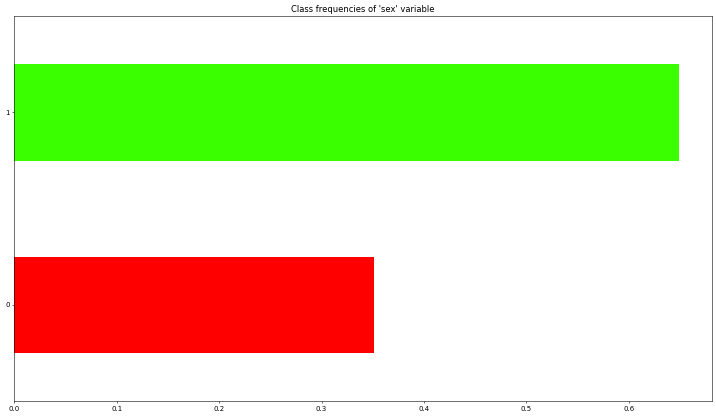

In [28]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(demographic_df["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

- Males are '0' and females are '1'. 
- This data set is reporting more males than females.
- About half the females to males.

### What are the anaemia cases in the **dataset?**

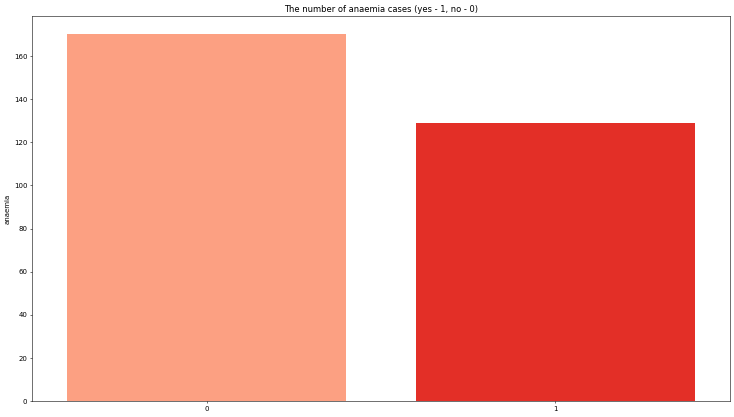

In [29]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = blood_metrics_df["anaemia"].value_counts().index,
            y = blood_metrics_df["anaemia"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

- It can be seen from this graph that the presence of anemia is less than the absence.
- There are over 160 patients with no anaemia.
- There are slightly over 120 patients with anaemia.

### Are there duplicates in **image_prediction**

In [30]:
sum(complete_df.duplicated()==True)

0

- There are no duplicates in the dataset.

### What are the different levels of the **platelets?**

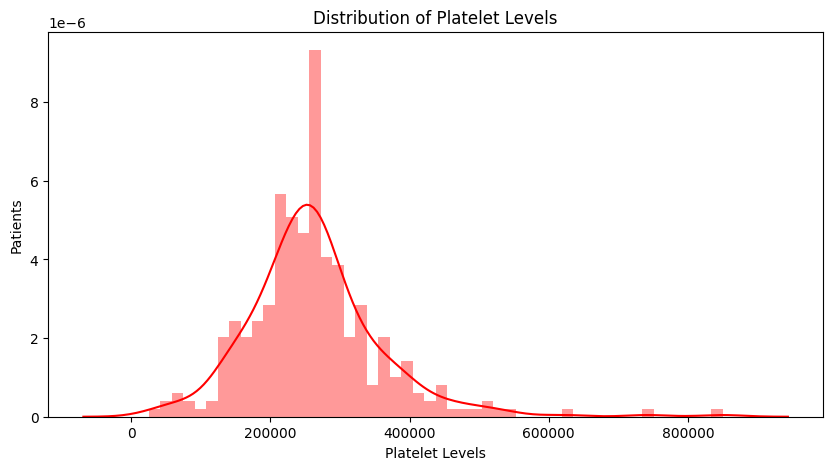

In [31]:
plt.figure(figsize = [10,5])
sns.distplot(complete_df.platelets , kde = True, bins = 50, color ='Red')
plt.title('Distribution of Platelet Levels')
plt.ylabel('Patients')
plt.xlabel('Platelet Levels');

- You can see an outlier well outside the range of the others at above 800,000.
- The majority of the levels are more grouped together.
- Around the 300,000 level were the majority of the paitents are at.

### What are the different levels of platelets bewtween the **genders?**

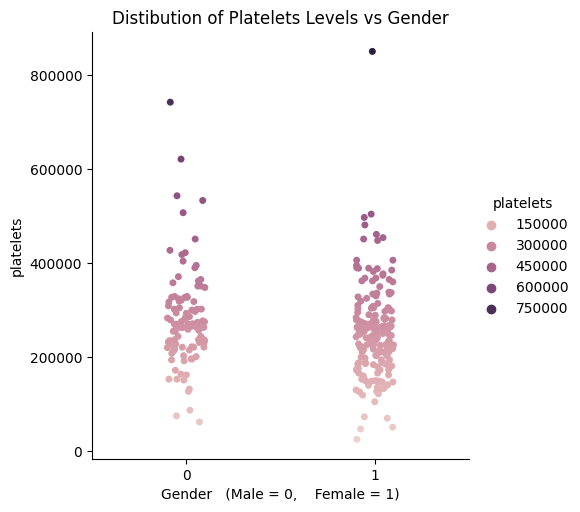

In [32]:
sns.catplot( x= 'sex', y = 'platelets', hue = 'platelets', data = complete_df)
plt.title('Distibution of Platelets Levels vs Gender')
plt.xlabel('Gender   (Male = 0,    Female = 1)');

-  They have a similar realtionship bewtween the two. 
-  The females to have a outlier with one over 800,000.
-  The highest level in the males falls under the 800,000 mark.

### What are the Creatinine Phosphokinase **distribution?**

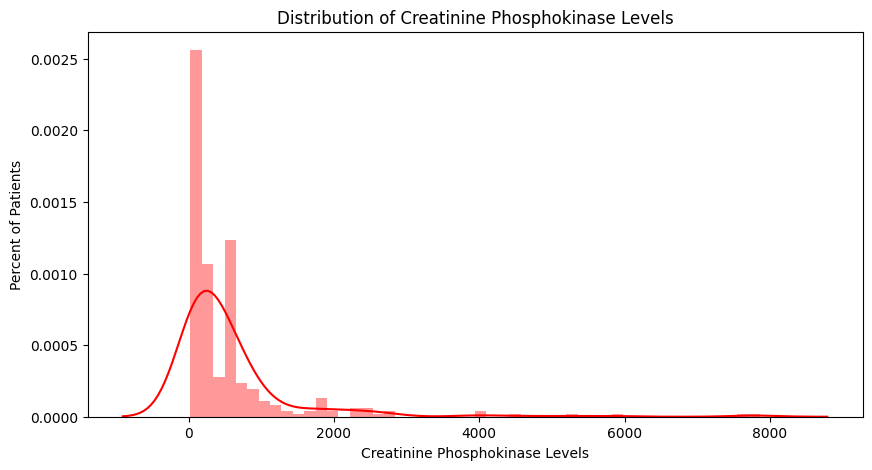

In [33]:
plt.figure(figsize = [10,5])
sns.distplot(complete_df.creatinine_phosphokinase , kde = True, bins = 50, color ='Red')
plt.title('Distribution of Creatinine Phosphokinase Levels')
plt.ylabel('Percent of Patients')
plt.xlabel('Creatinine Phosphokinase Levels');

- There are two outliers at the 8,000 level.  
- The majority of the levels stay under the 2,000 level.

### What are the Creatinine Phosphokinase Levels by Gender?

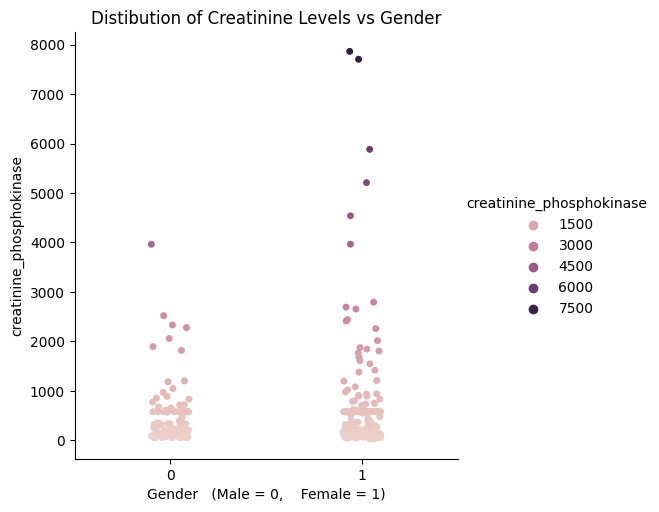

In [34]:
sns.catplot( x= 'sex', y = 'creatinine_phosphokinase', hue = 'creatinine_phosphokinase', data = complete_df)
plt.title('Distibution of Creatinine Levels vs Gender')
plt.xlabel('Gender   (Male = 0,    Female = 1)');

- This is an easy way to see the highest levels are with females, much high than the males. 
- The female levels go up too 8000 while the highes male is 4000.
- There are 5 female patients with the levels above the males.

### What are the Serum Creatinine **distribution?**

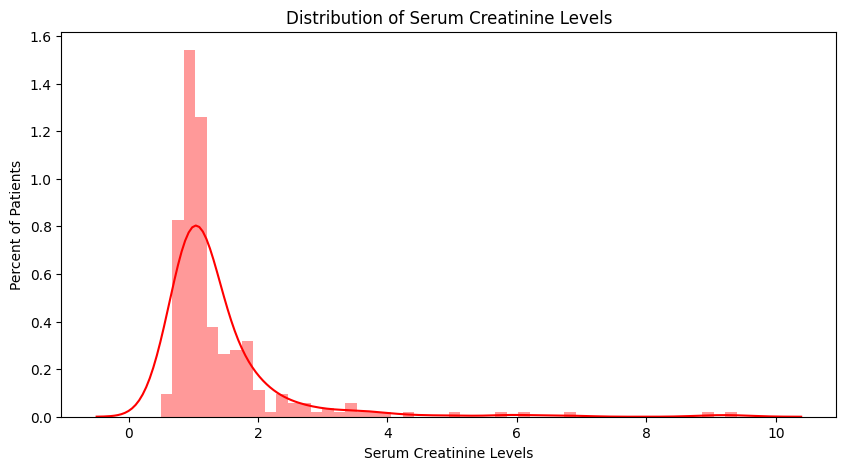

In [35]:
plt.figure(figsize = [10,5])
sns.distplot(complete_df.serum_creatinine , kde = True, bins = 50, color ='Red')
plt.title('Distribution of Serum Creatinine Levels')
plt.ylabel('Percent of Patients')
plt.xlabel('Serum Creatinine Levels');

- There is a large range in these levels.
- Although majority of patients do have lower levels.
- There are a few scatter outliers.

### What is the different levels in serum_creatinine bewtween the **genders?**

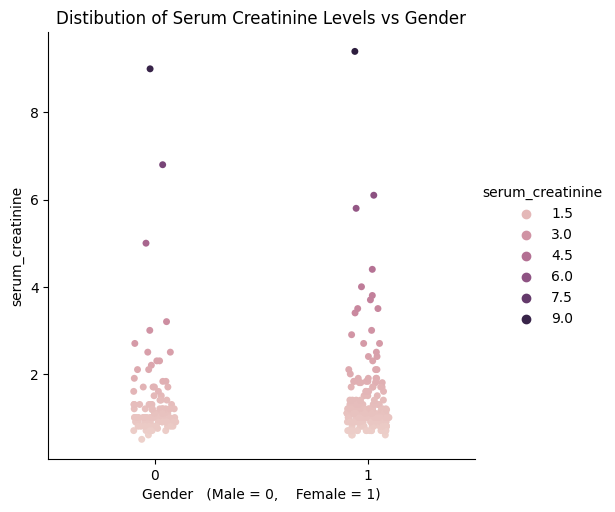

In [36]:
sns.catplot( x= 'sex', y = 'serum_creatinine', hue = 'serum_creatinine', data = complete_df)
plt.title('Distibution of Serum Creatinine Levels vs Gender')
plt.xlabel('Gender   (Male = 0,    Female = 1)');

- This variable has very similar relationship levels bewtween males and females.
- They both have outliers above 8.0.

### What is the Serum Sodium **distribution?**

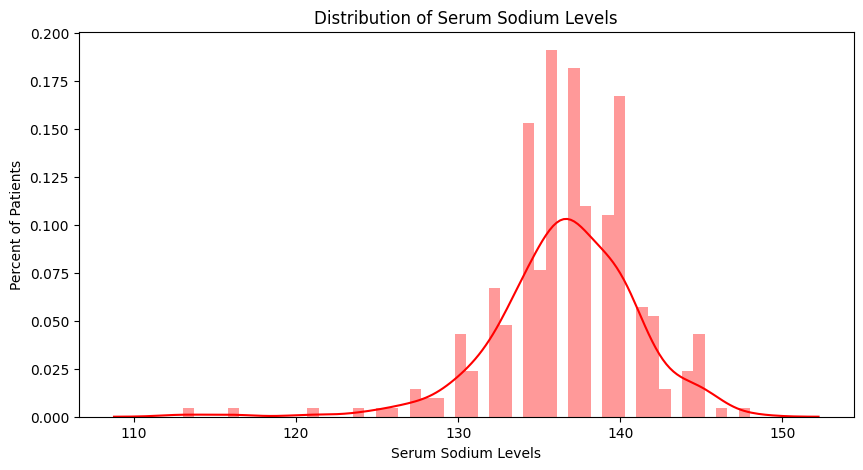

In [37]:
plt.figure(figsize = [10,5])
sns.distplot(complete_df.serum_sodium , kde = True, bins = 50, color ='Red')
plt.title('Distribution of Serum Sodium Levels')
plt.ylabel('Percent of Patients')
plt.xlabel('Serum Sodium Levels');

- These levels trend has a large range on average bewtween the patients. 
- The majority of the range is bewtween 120 - 150.
- The outliers are in the lower levels under 120.

### What are the levels of serum_sodium bewtween the **genders?**

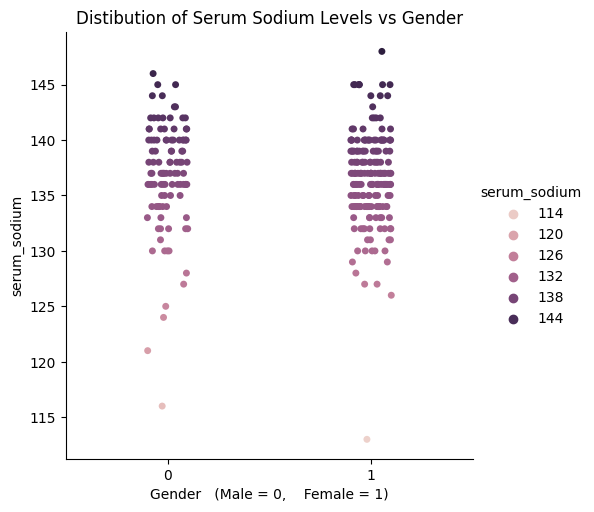

In [38]:
sns.catplot( x= 'sex', y = 'serum_sodium', hue = 'serum_sodium', data = complete_df)
plt.title('Distibution of Serum Sodium Levels vs Gender')
plt.xlabel('Gender   (Male = 0,    Female = 1)');

- The realtionship between the levels are similiar.
- Although the males to have a few patients with much lower levels with one patient at 116.
- There is one outliers for the females with the lowest range under the 115 mark.

### What is the count of the number of deaths from follow ups on patients vs the patients **alive?**

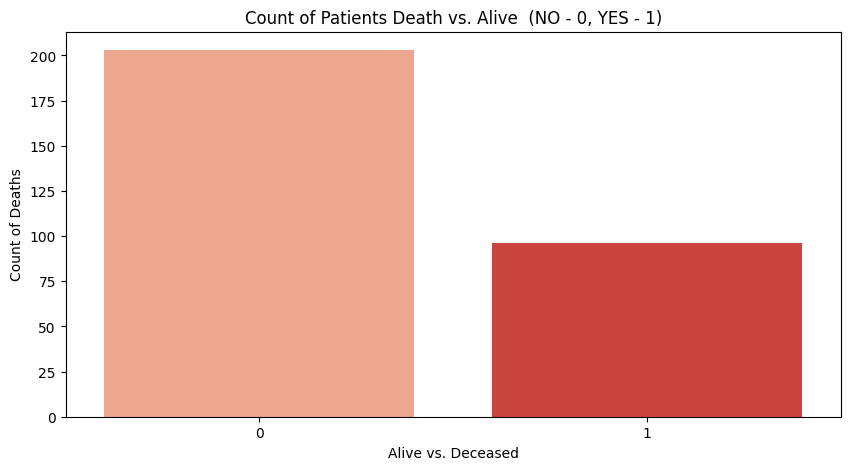

In [39]:
plt.figure(figsize = [10, 5])
sns.countplot(data = complete_df, x = 'DEATH_EVENT', palette = "Reds")
plt.ylabel('Count of Deaths')
plt.xlabel('Alive vs. Deceased')
plt.title('Count of Patients Death vs. Alive  (NO - 0, YES - 1)');

- There are 200 patients reporting alive in the follow up.
- There are 100 reporting deceased.

### What is the Count of the number of smokers vs non smokers in the patients?

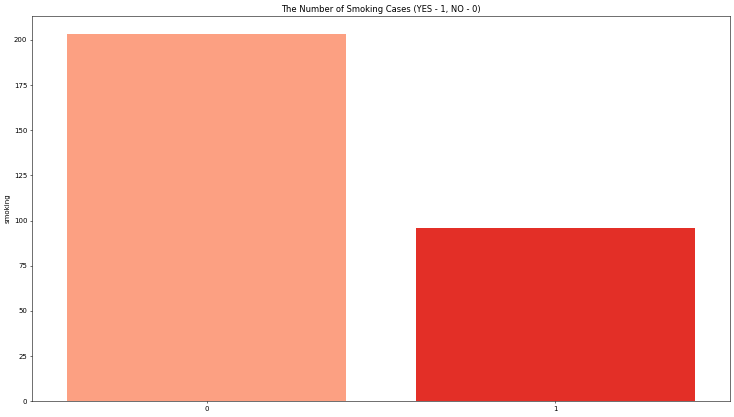

In [40]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = complete_df["smoking"].value_counts().index,
            y = complete_df["smoking"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1)
plt.title("The Number of Smoking Cases (YES - 1, NO - 0)");

- Most paitents are non-smokers with a count around 200.
- The smoker patients count is around 100.

### What is the Count of the number of diabetics in the **patients?**

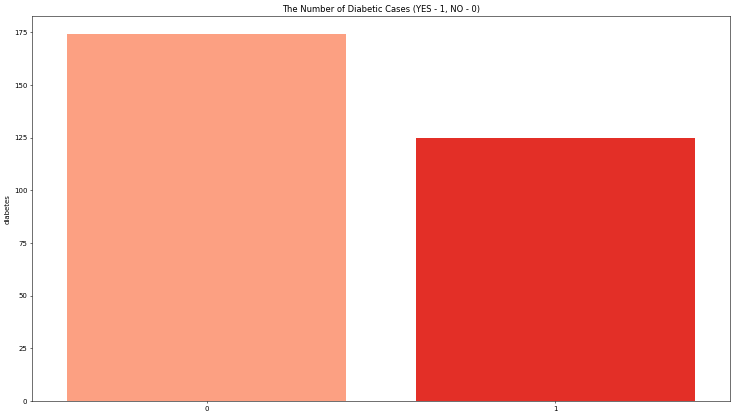

In [41]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = complete_df["diabetes"].value_counts().index,
            y = complete_df["diabetes"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1)
plt.title("The Number of Diabetic Cases (YES - 1, NO - 0)");

- There are around 175 non diabetics.
- There are around 125 reporting diabetics in the data frame.

### What is the realtionship between the serum creatinine and serum sodium **levels?**

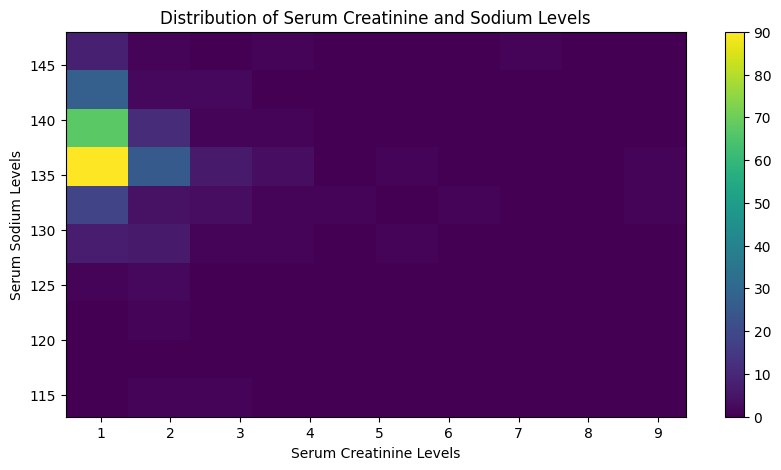

In [42]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 1, 1)
plt.hist2d(data = complete_df, x = 'serum_creatinine', y = 'serum_sodium')
plt.colorbar()
plt.xlabel('Serum Creatinine Levels')
plt.ylabel('Serum Sodium Levels')
plt.title('Distribution of Serum Creatinine and Sodium Levels');

- The serum Creatinine levels stay around 1.
- The Serum Sodium Levels have alittle more various but usual is between 135-140.

### What does the overall realtionships bewtween the variables look **like?**

In [43]:
corr = complete_df.corr()
corr.style.background_gradient(cmap='Reds')

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine,age,sex,time,DEATH_EVENT
smoking,1.000000,-0.067315,0.004813,0.028234,0.002421,-0.026890,-0.147173,-0.027414,0.018668,0.445892,-0.022839,-0.012623
ejection_fraction,-0.067315,1.000000,0.175902,0.072177,-0.044080,0.050053,-0.004850,-0.011302,0.060098,-0.148386,0.041729,-0.268603
serum_sodium,0.004813,0.175902,1.000000,0.062125,0.059550,0.095685,-0.089551,-0.189095,-0.045966,-0.027566,0.087640,-0.195204
platelets,0.028234,0.072177,0.062125,1.000000,0.024463,0.007991,0.092193,-0.041198,-0.052354,-0.125120,0.010514,-0.049139
creatinine_phosphokinase,0.002421,-0.044080,0.059550,0.024463,1.000000,-0.010046,-0.009639,-0.016408,-0.081584,0.079791,-0.009346,0.062728
uniqueID,-0.026890,0.050053,0.095685,0.007991,-0.010046,1.000000,0.030481,-0.155842,-0.226271,-0.018183,0.994911,-0.543600
diabetes,-0.147173,-0.004850,-0.089551,0.092193,-0.009639,0.030481,1.000000,-0.046975,-0.101012,-0.157730,0.033726,-0.001943
serum_creatinine,-0.027414,-0.011302,-0.189095,-0.041198,-0.016408,-0.155842,-0.046975,1.000000,0.159187,0.006970,-0.149315,0.294278
age,0.018668,0.060098,-0.045966,-0.052354,-0.081584,-0.226271,-0.101012,0.159187,1.000000,0.065430,-0.224068,0.253729
sex,0.445892,-0.148386,-0.027566,-0.125120,0.079791,-0.018183,-0.157730,0.006970,0.065430,1.000000,-0.015608,-0.004316


- The outliers stand out the most when looking at all the variables this way.

### What is the age and the number of days until follow up reported time of death since first **treated?**

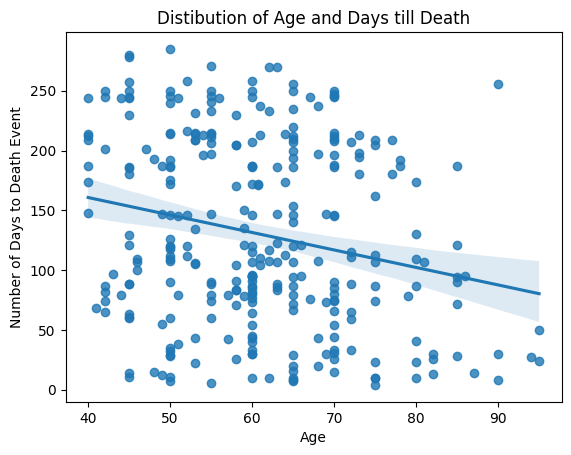

In [44]:
sns.regplot(x=complete_df['age'], y=complete_df['time'])
plt.title('Distibution of Age and Days till Death')
plt.xlabel('Age')
plt.ylabel('Number of Days to Death Event');

- The age of 40 all have over 50 days the the reporting of a death.
- This shows that the the older the patient is the less days they had till the death date.
- The average range of age reporting deceased is in the 60-70 range.

# Summary of findings in the data

This dataset has many factors that can be analyzed. When looking at the heart there are many attributes to take into account, such as the platelet, creatinine phosphokinase, serum creatinine, and Serum Sodium levels. Wheater or not the patients were smokers, has diabetes, high blood pressure, or anaemia. 

Some of the details I found interesting to anaylsis was the gender of the patients. Such as there are more males in the data than females, and 95% of those males were smokers out of 194 males. While there are only a percentage of 4% of female smokers out of 105 females. There are 61 males and 133 females with high blood pressure reported. There are 77 males and 117 females with anaemia reported. So while most of the males are smokers the women have high numbers in blood pressure and anaemia.

The different levels all have similair relationships bewtween males and female, although there are some outliers that show in the anaylsis. In the platelet levels there is a similar realtionship bewtween the two. Although the females to have a outlier with one over 800,000. The highest level in the males falls under the 800,000 mark. With the Creatinine Phosphokanise levels the highest levels are with females, much high than the males. The female levels go up to 8000 while the highest male is 4000. There are 5 female patients with the levels above the males. In Serum Creatinine levels it has very similar relationship levels bewtween males and females. They both have outliers above 8.0. Finally with Serum Sodium the males to have a few patients with much lower levels with one patient at 116. There is one outliers for the females with the lowest range under the 115 mark.

While looking at the different genders the data, it is uneven with the count of male vs females. With the data we have the males has a much higher rate of smokers, but interstingly enough the females had more outliers in the different levels that we looked at. The females also reported higher numbers in high blood pressure and anaemia. I would suggest getting more female patients in the datbase, to see if thisif the numbers will even out or do the males tend to have a better average with the levels we have looked at.

# Data Enrichment

What I would recommend for ways to enrich the data to get more accurate results and and better understanding of the patients are the following.

- I would try and even out the gender ratios, getting more females in the data set would be benefical for the analysis. In looking at how the different factors may affect the genders.
- Also the patients diet, daily activty, weight, and height would be an asset to the data. Adding those factors in would give a better idea of the lifestyle for the patients. Is there and minimum amount of excerise patients should be doing to imorove their heart?
- Another item I would like added to the data is symptoms. With symptoms I could compare the realtionship with the symptoms and all the different levels we have already in the data set. Does smoking, diabetes or age amplify the symptoms?
- Lastly I would add the patients family history. Are some of the abnormalities reported genetics? If so will diet and excerise prevent or delay heart failure?

